In [1]:
import pandas as pd
from sqlalchemy import create_engine

In [2]:
populationData = pd.read_csv("..\sc-est2019-alldata6.csv")
state = pd.read_csv("States.csv")

In [3]:
state.head()

,st,states
0,AL,ALABAMA
1,AK,ALASKA
2,AS,AMERICAN SAMOA
3,AZ,ARIZONA
4,AR,ARKANSAS


In [4]:
population_df = pd.DataFrame(populationData)
population_df.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,SEX,ORIGIN,RACE,AGE,CENSUS2010POP,...,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019
0,40,3,6,1,Alabama,0,0,1,0,37991,...,37818,38678,37824,36812,37575,37698,37629,37526,36370,35594
1,40,3,6,1,Alabama,0,0,1,1,38150,...,38036,37719,38597,37854,36968,37882,37732,37904,37641,36679
2,40,3,6,1,Alabama,0,0,1,2,39738,...,39570,38202,37653,38528,37769,37123,38048,37975,38172,37904
3,40,3,6,1,Alabama,0,0,1,3,39827,...,39805,39690,38113,37716,38605,37896,37266,38170,38197,38510
4,40,3,6,1,Alabama,0,0,1,4,39353,...,39493,39872,39628,38122,37751,38625,37954,37322,38312,38476


In [5]:
population_df.columns = population_df.columns.str.lower()
population_df.head()

,sumlev,region,division,state,name,sex,origin,race,age,census2010pop,...,popestimate2010,popestimate2011,popestimate2012,popestimate2013,popestimate2014,popestimate2015,popestimate2016,popestimate2017,popestimate2018,popestimate2019
0,40,3,6,1,Alabama,0,0,1,0,37991,...,37818,38678,37824,36812,37575,37698,37629,37526,36370,35594
1,40,3,6,1,Alabama,0,0,1,1,38150,...,38036,37719,38597,37854,36968,37882,37732,37904,37641,36679
2,40,3,6,1,Alabama,0,0,1,2,39738,...,39570,38202,37653,38528,37769,37123,38048,37975,38172,37904
3,40,3,6,1,Alabama,0,0,1,3,39827,...,39805,39690,38113,37716,38605,37896,37266,38170,38197,38510
4,40,3,6,1,Alabama,0,0,1,4,39353,...,39493,39872,39628,38122,37751,38625,37954,37322,38312,38476


# STATE TABLE

In [6]:
state_df = pd.DataFrame(population_df.name.unique(), columns=['state'])
state_df['key'] = ['st'+str(x+1) for x in range(len(state_df))]

for a in range(len(state)):
    state_df.loc[state_df.state.str.lower()==state.states[a].lower(),'st'] = state.st[a].lower()
    
state_df = state_df[['key','st', 'state']]

state_df.head()

,key,st,state
0,st1,al,Alabama
1,st2,ak,Alaska
2,st3,az,Arizona
3,st4,ar,Arkansas
4,st5,ca,California


In [7]:
for a in range(len(state_df)):
    population_df.loc[population_df.name.str.lower()==state_df.state[a].lower(),"state"] = state_df.key[a].lower()

In [8]:
population_df.head()

,sumlev,region,division,state,name,sex,origin,race,age,census2010pop,...,popestimate2010,popestimate2011,popestimate2012,popestimate2013,popestimate2014,popestimate2015,popestimate2016,popestimate2017,popestimate2018,popestimate2019
0,40,3,6,st1,Alabama,0,0,1,0,37991,...,37818,38678,37824,36812,37575,37698,37629,37526,36370,35594
1,40,3,6,st1,Alabama,0,0,1,1,38150,...,38036,37719,38597,37854,36968,37882,37732,37904,37641,36679
2,40,3,6,st1,Alabama,0,0,1,2,39738,...,39570,38202,37653,38528,37769,37123,38048,37975,38172,37904
3,40,3,6,st1,Alabama,0,0,1,3,39827,...,39805,39690,38113,37716,38605,37896,37266,38170,38197,38510
4,40,3,6,st1,Alabama,0,0,1,4,39353,...,39493,39872,39628,38122,37751,38625,37954,37322,38312,38476


# sex table

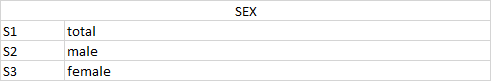

In [9]:
sex_df = pd.DataFrame({'key' :['s1','s2','s3'], 'sex':['total','male','female']})
sex_df.head()

,key,sex
0,s1,total
1,s2,male
2,s3,female


In [10]:
# changing sex keys to s1=total, s2=male, s3= females
population_df.sex = population_df.sex.replace([0,1,2], list(sex_df.key))
population_df.head()

,sumlev,region,division,state,name,sex,origin,race,age,census2010pop,...,popestimate2010,popestimate2011,popestimate2012,popestimate2013,popestimate2014,popestimate2015,popestimate2016,popestimate2017,popestimate2018,popestimate2019
0,40,3,6,st1,Alabama,s1,0,1,0,37991,...,37818,38678,37824,36812,37575,37698,37629,37526,36370,35594
1,40,3,6,st1,Alabama,s1,0,1,1,38150,...,38036,37719,38597,37854,36968,37882,37732,37904,37641,36679
2,40,3,6,st1,Alabama,s1,0,1,2,39738,...,39570,38202,37653,38528,37769,37123,38048,37975,38172,37904
3,40,3,6,st1,Alabama,s1,0,1,3,39827,...,39805,39690,38113,37716,38605,37896,37266,38170,38197,38510
4,40,3,6,st1,Alabama,s1,0,1,4,39353,...,39493,39872,39628,38122,37751,38625,37954,37322,38312,38476


# race table
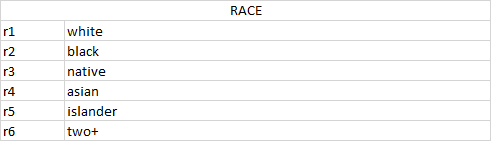

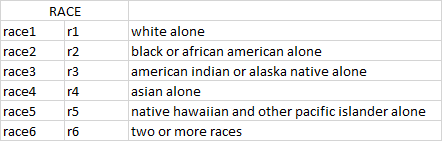

In [11]:
race_name=['white alone', 'black or african american alone', 'american indian or alaska native alone',
           'asian alone' ,'native hawaiian and other pacific islander alone','two or more races']
race = ['white', 'black', 'native', 'asian', 'islander','two+']
race_key = ["r1","r2","r3","r4","r5","r6"]
race_key2 = ['race'+str(key) for key in range(len(race_key))]

race_df = pd.DataFrame({'key' :race_key, 'race':race, 'race2':race_name})
# race_df_expand = pd.DataFrame({'key':race_key2, 'foreign_key': race_key, 'race':race_name})

race_df.head()
# print(race_df_expand.head())


,key,race,race2
0,r1,white,white alone
1,r2,black,black or african american alone
2,r3,native,american indian or alaska native alone
3,r4,asian,asian alone
4,r5,islander,native hawaiian and other pacific islander alone


In [12]:
population_df.race = population_df.race.replace([1,2,3,4,5,6], list(race_df.key))
population_df.head()

,sumlev,region,division,state,name,sex,origin,race,age,census2010pop,...,popestimate2010,popestimate2011,popestimate2012,popestimate2013,popestimate2014,popestimate2015,popestimate2016,popestimate2017,popestimate2018,popestimate2019
0,40,3,6,st1,Alabama,s1,0,r1,0,37991,...,37818,38678,37824,36812,37575,37698,37629,37526,36370,35594
1,40,3,6,st1,Alabama,s1,0,r1,1,38150,...,38036,37719,38597,37854,36968,37882,37732,37904,37641,36679
2,40,3,6,st1,Alabama,s1,0,r1,2,39738,...,39570,38202,37653,38528,37769,37123,38048,37975,38172,37904
3,40,3,6,st1,Alabama,s1,0,r1,3,39827,...,39805,39690,38113,37716,38605,37896,37266,38170,38197,38510
4,40,3,6,st1,Alabama,s1,0,r1,4,39353,...,39493,39872,39628,38122,37751,38625,37954,37322,38312,38476


# origin table
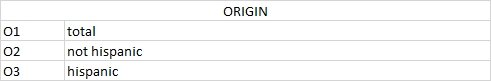

In [13]:
origin=['total','not hispanic','hispanic']
ori_key=["o1","o2","o3"]
origin_df= pd.DataFrame({'key' :ori_key, 'origin':origin})
origin_df.head()

,key,origin
0,o1,total
1,o2,not hispanic
2,o3,hispanic


In [14]:
population_df.origin = population_df.origin.replace([0,1,2], list(origin_df.key))
population_df.head()

,sumlev,region,division,state,name,sex,origin,race,age,census2010pop,...,popestimate2010,popestimate2011,popestimate2012,popestimate2013,popestimate2014,popestimate2015,popestimate2016,popestimate2017,popestimate2018,popestimate2019
0,40,3,6,st1,Alabama,s1,o1,r1,0,37991,...,37818,38678,37824,36812,37575,37698,37629,37526,36370,35594
1,40,3,6,st1,Alabama,s1,o1,r1,1,38150,...,38036,37719,38597,37854,36968,37882,37732,37904,37641,36679
2,40,3,6,st1,Alabama,s1,o1,r1,2,39738,...,39570,38202,37653,38528,37769,37123,38048,37975,38172,37904
3,40,3,6,st1,Alabama,s1,o1,r1,3,39827,...,39805,39690,38113,37716,38605,37896,37266,38170,38197,38510
4,40,3,6,st1,Alabama,s1,o1,r1,4,39353,...,39493,39872,39628,38122,37751,38625,37954,37322,38312,38476


# division table
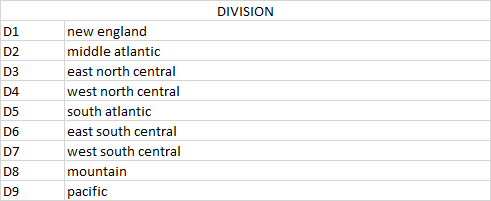

In [15]:
divi_key = ["d1","d2","d3","d4","d5","d6","d7","d8","d9"]
divi = ['new england','middle atlantic','east north central','west north central',
        'south atlantic','east south central', 'west south central','mountain', 'pacific']
division_df =pd.DataFrame({'key': divi_key, 'division': divi})
division_df.head()

,key,division
0,d1,new england
1,d2,middle atlantic
2,d3,east north central
3,d4,west north central
4,d5,south atlantic


In [16]:
population_df.division = population_df.division.replace([1,2,3,4,5,6,7,8,9], list(division_df.key))
population_df.head()

,sumlev,region,division,state,name,sex,origin,race,age,census2010pop,...,popestimate2010,popestimate2011,popestimate2012,popestimate2013,popestimate2014,popestimate2015,popestimate2016,popestimate2017,popestimate2018,popestimate2019
0,40,3,d6,st1,Alabama,s1,o1,r1,0,37991,...,37818,38678,37824,36812,37575,37698,37629,37526,36370,35594
1,40,3,d6,st1,Alabama,s1,o1,r1,1,38150,...,38036,37719,38597,37854,36968,37882,37732,37904,37641,36679
2,40,3,d6,st1,Alabama,s1,o1,r1,2,39738,...,39570,38202,37653,38528,37769,37123,38048,37975,38172,37904
3,40,3,d6,st1,Alabama,s1,o1,r1,3,39827,...,39805,39690,38113,37716,38605,37896,37266,38170,38197,38510
4,40,3,d6,st1,Alabama,s1,o1,r1,4,39353,...,39493,39872,39628,38122,37751,38625,37954,37322,38312,38476


# Age table
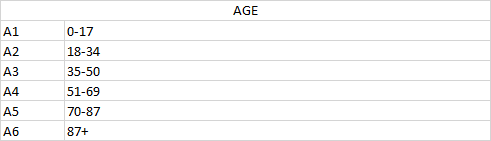


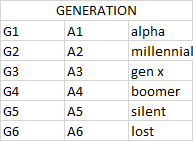

In [17]:
age_range = ['0-17','18-34','35-50','51-69','70-87','87+']
generation = ['alpha','millennial','gen x','boomer','silent','lost']
age_key = ['a1','a2','a3','a4','a5','a6']
age_df = pd.DataFrame({'key': age_key, 'age_range': age_range, 'generation': generation})
age_df.head()

,key,age_range,generation
0,a1,0-17,alpha
1,a2,18-34,millennial
2,a3,35-50,gen x
3,a4,51-69,boomer
4,a5,70-87,silent


In [18]:
# age bin
age_bin = [0,17,34,49,69,87,10000]
bin_label = age_key
bin_population_df=population_df.copy()
bin_population_df.age=pd.cut(population_df['age'],age_bin,right=False, labels=bin_label)

In [19]:
bin_population_df.age.unique()

[a1, a2, a3, a4, a5]
Categories (5, object): [a1 < a2 < a3 < a4 < a5]

In [20]:
bin_population_df.reset_index()
bin_population_df.head()

,sumlev,region,division,state,name,sex,origin,race,age,census2010pop,...,popestimate2010,popestimate2011,popestimate2012,popestimate2013,popestimate2014,popestimate2015,popestimate2016,popestimate2017,popestimate2018,popestimate2019
0,40,3,d6,st1,Alabama,s1,o1,r1,a1,37991,...,37818,38678,37824,36812,37575,37698,37629,37526,36370,35594
1,40,3,d6,st1,Alabama,s1,o1,r1,a1,38150,...,38036,37719,38597,37854,36968,37882,37732,37904,37641,36679
2,40,3,d6,st1,Alabama,s1,o1,r1,a1,39738,...,39570,38202,37653,38528,37769,37123,38048,37975,38172,37904
3,40,3,d6,st1,Alabama,s1,o1,r1,a1,39827,...,39805,39690,38113,37716,38605,37896,37266,38170,38197,38510
4,40,3,d6,st1,Alabama,s1,o1,r1,a1,39353,...,39493,39872,39628,38122,37751,38625,37954,37322,38312,38476


In [21]:
# Fa

In [22]:
# # state table with key
# state_df.to_csv('..\SQL TABLE\state_w_key.csv', index=False)

# # sex table with key
# sex_df.to_csv('..\SQL TABLE\sex_w_key.csv', index=False)

# # race table with key
# race_df.to_csv('race_w_key.csv', index=False)
# # race_df.to_csv('..\SQL TABLE\race_w_key.csv', index=False)

# # origin table with key
# origin_df.to_csv('..\SQL TABLE\origin_w_key.csv', index=False)

# # division table with key
# division_df.to_csv('..\SQL TABLE\division_w_key.csv', index=False)

# # age table with key
# age_df.to_csv('age_w_key.csv', index=False)

# # main table with keys
# bin_population_df.to_csv('..\SQL TABLE\population_age_sex_race_w_key.csv', index=False)

# senate data population

In [140]:
senate = pd.read_csv("..\SPopulation.csv")
senate.columns = senate.columns.str.lower()
senate.head()

,state,senator,party,born,assumed office,term up,population
0,Alabama,Richard Shelby,Republican,(age 86),"January 3, 1987",2022,4903185
1,Alabama,Tommy Tuberville,Republican,(age 66),"January 3, 2021",2026,4903185
2,Alaska,Lisa Murkowski,Republican,(age 63),"December 20, 2002",2022,731545
3,Alaska,Dan Sullivan,Republican,(age 56),"January 3, 2015",2026,731545
4,Arizona,Kyrsten Sinema,Democratic,(age 44),"January 3, 2019",2024,7278717


In [141]:
senate['assumed office']=pd.to_datetime(senate['assumed office'])
senate.head()

,state,senator,party,born,assumed office,term up,population
0,Alabama,Richard Shelby,Republican,(age 86),1987-01-03,2022,4903185
1,Alabama,Tommy Tuberville,Republican,(age 66),2021-01-03,2026,4903185
2,Alaska,Lisa Murkowski,Republican,(age 63),2002-12-20,2022,731545
3,Alaska,Dan Sullivan,Republican,(age 56),2015-01-03,2026,731545
4,Arizona,Kyrsten Sinema,Democratic,(age 44),2019-01-03,2024,7278717


In [142]:
senate.born = senate.born.str.slice(start=5, stop=7).astype(int)
senate.head()

,state,senator,party,born,assumed office,term up,population
0,Alabama,Richard Shelby,Republican,86,1987-01-03,2022,4903185
1,Alabama,Tommy Tuberville,Republican,66,2021-01-03,2026,4903185
2,Alaska,Lisa Murkowski,Republican,63,2002-12-20,2022,731545
3,Alaska,Dan Sullivan,Republican,56,2015-01-03,2026,731545
4,Arizona,Kyrsten Sinema,Democratic,44,2019-01-03,2024,7278717


In [143]:
for a in range(len(state_df)):
    senate.loc[senate.state.str.lower() == state_df.state[a].lower(),'st'] = state_df.key[a].lower()

In [144]:
senate['key'] = [key for key in range(len(senate))]

In [145]:
senate_df = senate[['key','st', 'state', 'senator', 'party', 'born', 'assumed office', 'term up', 'population']]
senate_df.head()

,key,st,state,senator,party,born,assumed office,term up,population
0,0,st1,Alabama,Richard Shelby,Republican,86,1987-01-03,2022,4903185
1,1,st1,Alabama,Tommy Tuberville,Republican,66,2021-01-03,2026,4903185
2,2,st2,Alaska,Lisa Murkowski,Republican,63,2002-12-20,2022,731545
3,3,st2,Alaska,Dan Sullivan,Republican,56,2015-01-03,2026,731545
4,4,st3,Arizona,Kyrsten Sinema,Democratic,44,2019-01-03,2024,7278717


In [146]:
senate_df.to_csv('..\SQL TABLE\senate_w_key.csv', index=False)

# Religious df general population

In [246]:
pop_religious = pd.read_csv("..\ReligiousAffiliationByState.csv")
pop_religious.columns = pop_religious.columns.str.lower()

for a in range(len(state_df)):
    pop_religious.loc[pop_religious.state.str.lower() == state_df.state[a].lower(),'st'] = state_df.key[a].lower()

In [247]:
pop_religious.head()

,state,baptist family (et),methodist family (et),non-denominational family (et),lutheran family (et),presbyterian (et),pentecostal family (et),episcopalian/anglican family (et),restorationist family (et),congregationalist family (et),...,buddhist,hindu,other world religions,unitarians,new age,native american religions,atheist,agnostic,nothing in particular,st
0,Washington,3,< 1,8,2,1,4,< 1,1,< 1,...,1,1,<1,1,1,<1,5,5,22.0,st48
1,Oregon,8,<1,7,1,1,6,<1,2,<1,...,<1,<1,1,2,1,<1,5,8,18.0,st38
2,California,3,<1,5,1,1,4,<1,1,<1,...,2,2,1,1,<1,<1,4,5,18.0,st5
3,Alaska,6,<1,5,1,2,2,<1,1,<1,...,1,<1,1,2,1,1,5,6,20.0,st2
4,Hawaii,4,<1,7,1,1,3,<1,3,<1,...,8,<1,<1,1,<1,<1,2,5,20.0,st12


In [248]:
# move key to fist colums
cols = list(pop_religious.columns)
cols = [cols[-1]] + cols[:-1]
pop_religious = pop_religious[cols]

pop_religious.head()

,st,state,baptist family (et),methodist family (et),non-denominational family (et),lutheran family (et),presbyterian (et),pentecostal family (et),episcopalian/anglican family (et),restorationist family (et),...,muslim,buddhist,hindu,other world religions,unitarians,new age,native american religions,atheist,agnostic,nothing in particular
0,st48,Washington,3,< 1,8,2,1,4,< 1,1,...,<1,1,1,<1,1,1,<1,5,5,22.0
1,st38,Oregon,8,<1,7,1,1,6,<1,2,...,1,<1,<1,1,2,1,<1,5,8,18.0
2,st5,California,3,<1,5,1,1,4,<1,1,...,1,2,2,1,1,<1,<1,4,5,18.0
3,st2,Alaska,6,<1,5,1,2,2,<1,1,...,<1,1,<1,1,2,1,1,5,6,20.0
4,st12,Hawaii,4,<1,7,1,1,3,<1,3,...,<1,8,<1,<1,1,<1,<1,2,5,20.0


In [249]:
# change all <1 to 0.5
pop_religious = pop_religious.replace('<1', 0.5)
pop_religious = pop_religious.replace('< 1', 0.5)
pop_religious = pop_religious.replace('', 0)
pop_religious = pop_religious.replace('<1<1', 0)
pop_religious = pop_religious.replace(' ', 0)
pop_religious = pop_religious.fillna(0)
pop_religious = pop_religious.replace('<16', 15.9)
pop_religious = pop_religious.replace(',', 0)
pop_religious = pop_religious.replace('<!', 0)




pop_religious.head()

,st,state,baptist family (et),methodist family (et),non-denominational family (et),lutheran family (et),presbyterian (et),pentecostal family (et),episcopalian/anglican family (et),restorationist family (et),...,muslim,buddhist,hindu,other world religions,unitarians,new age,native american religions,atheist,agnostic,nothing in particular
0,st48,Washington,3,0.5,8,2,1,4,0.5,1,...,0.5,1,1,0.5,1,1,0.5,5,5,22.0
1,st38,Oregon,8,0.5,7,1,1,6,0.5,2,...,1,0.5,0.5,1,2,1,0.5,5,8,18.0
2,st5,California,3,0.5,5,1,1,4,0.5,1,...,1,2,2,1,1,0.5,0.5,4,5,18.0
3,st2,Alaska,6,0.5,5,1,2,2,0.5,1,...,0.5,1,0.5,1,2,1,1,5,6,20.0
4,st12,Hawaii,4,0.5,7,1,1,3,0.5,3,...,0.5,8,0.5,0.5,1,0.5,0.5,2,5,20.0


In [250]:
pop_religious['key']=[key for key in range(len(pop_religious))]

In [251]:
# move key to fist colums
cols = list(pop_religious.columns)
cols = [cols[-1]] + cols[:-1]
pop_religious = pop_religious[cols]

In [252]:
pop_religious.head()

,key,st,state,baptist family (et),methodist family (et),non-denominational family (et),lutheran family (et),presbyterian (et),pentecostal family (et),episcopalian/anglican family (et),...,muslim,buddhist,hindu,other world religions,unitarians,new age,native american religions,atheist,agnostic,nothing in particular
0,0,st48,Washington,3,0.5,8,2,1,4,0.5,...,0.5,1,1,0.5,1,1,0.5,5,5,22.0
1,1,st38,Oregon,8,0.5,7,1,1,6,0.5,...,1,0.5,0.5,1,2,1,0.5,5,8,18.0
2,2,st5,California,3,0.5,5,1,1,4,0.5,...,1,2,2,1,1,0.5,0.5,4,5,18.0
3,3,st2,Alaska,6,0.5,5,1,2,2,0.5,...,0.5,1,0.5,1,2,1,1,5,6,20.0
4,4,st12,Hawaii,4,0.5,7,1,1,3,0.5,...,0.5,8,0.5,0.5,1,0.5,0.5,2,5,20.0


In [253]:
cols = list(pop_religious.columns)
cols = cols[3:]

for a in cols:
    pop_religious[a]=pop_religious[a].astype(int)

In [254]:
cols = list(pop_religious.columns)
cols = cols[27]
pop_religious[cols].unique()

array([0, 1])

In [255]:
type(pop_religious['baptist family (et)'][0])

numpy.int32

In [256]:
pop_religious.to_csv('..\SQL TABLE\pop_religious_w_key.csv', index=False)

# Load Data into Postgres

In [23]:
# Create database connection
connection_string = "postgres:320820@localhost:5432/Senate_analysis"
engine = create_engine(f'postgresql://{connection_string}')

In [24]:
# Confirm tables
engine.table_names()

['division', 'population', 'state', 'sex', 'origin', 'race', 'age']